In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
data.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
# Check for missing values
print(data.isnull().sum())


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [6]:
# Convert 'Date' column to datetime format
# Check if 'Date' column exists, otherwise try alternative names
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
else:
    # Try alternative column names like 'date' or 'DATE'
    alternative_names = ['date', 'DATE']
    for name in alternative_names:
        if name in data.columns:
            data['Date'] = pd.to_datetime(data[name], format='%d-%m-%Y')
            print(f"Found date column with name: {name}")
            break
    else:
        print("Date column not found in any of the expected names.")

Date column not found in any of the expected names.


In [7]:
# Rename columns for easier access
data.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)


In [8]:
# Get summary statistics
print(data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [23]:
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [24]:
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify cleaned column names
print(data.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [25]:
# Rename columns for easier access
data.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Verify renamed columns
print(data.columns)

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude'],
      dtype='object')


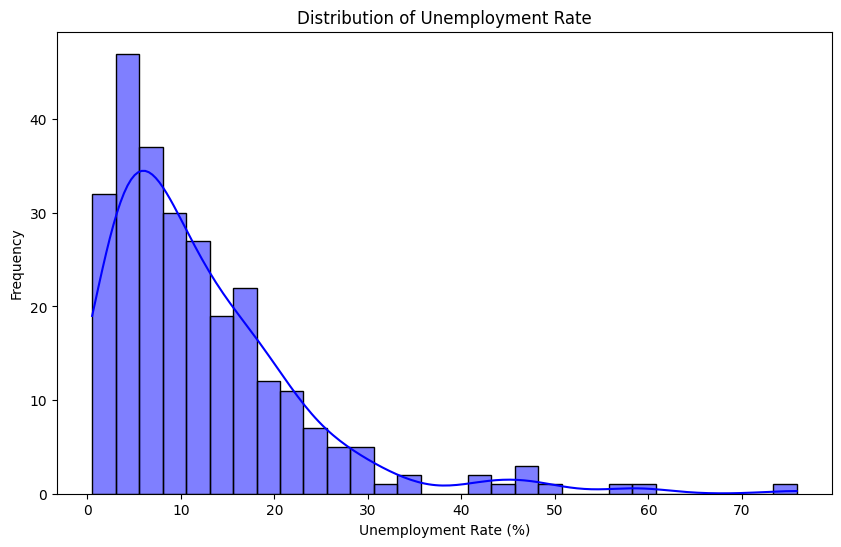

In [26]:
# Plot the distribution of unemployment rate
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment_Rate'], kde=True, bins=30, color='blue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

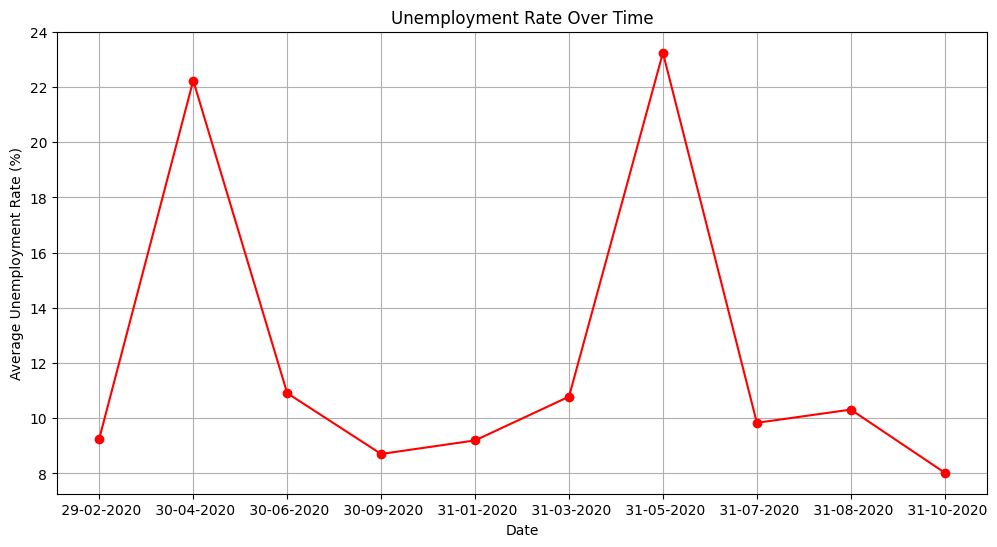

In [27]:
# Group data by date and calculate average unemployment rate
unemployment_over_time = data.groupby('Date')['Unemployment_Rate'].mean().reset_index()

# Plot unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(unemployment_over_time['Date'], unemployment_over_time['Unemployment_Rate'], marker='o', linestyle='-', color='red')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid()
plt.show()

<ipython-input-28-555c71225fa3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Unemployment_Rate', data=regional_unemployment, palette='viridis')


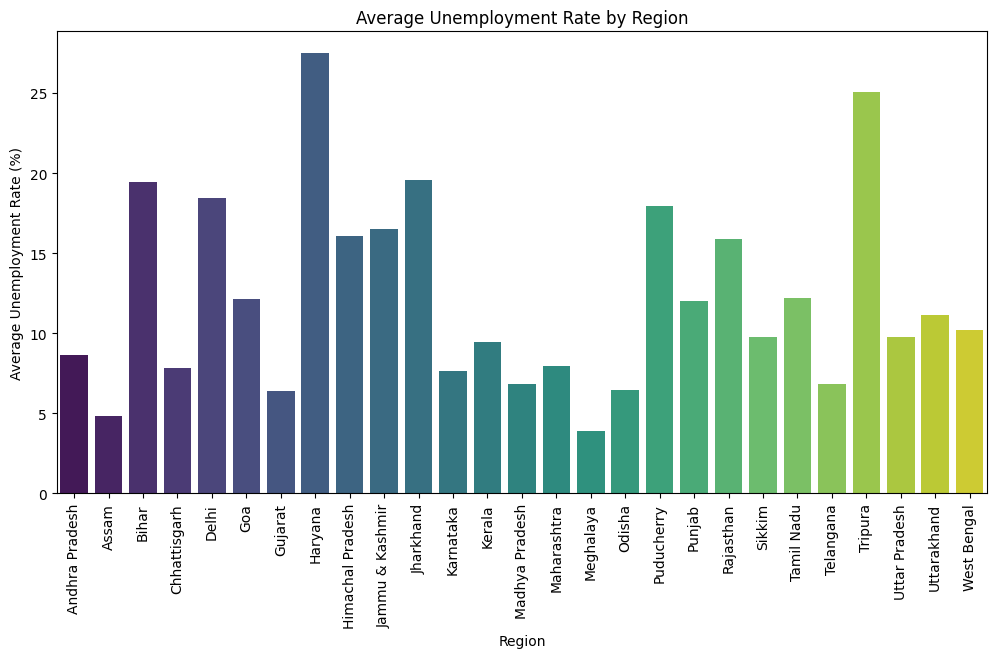

In [28]:
# Group data by region and calculate average unemployment rate
regional_unemployment = data.groupby('Region')['Unemployment_Rate'].mean().reset_index()

# Plot regional unemployment rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Unemployment_Rate', data=regional_unemployment, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

In [29]:
# Use Plotly for an interactive map
fig = px.scatter_geo(data,
                     lat='latitude',
                     lon='longitude',
                     color='Unemployment_Rate',
                     size='Unemployment_Rate',
                     hover_name='Region',
                     animation_frame='Date',
                     title='Unemployment Rate Across Regions Over Time',
                     scope='asia',
                     center={'lat': 20.5937, 'lon': 78.9629},
                     height=600)
fig.show()

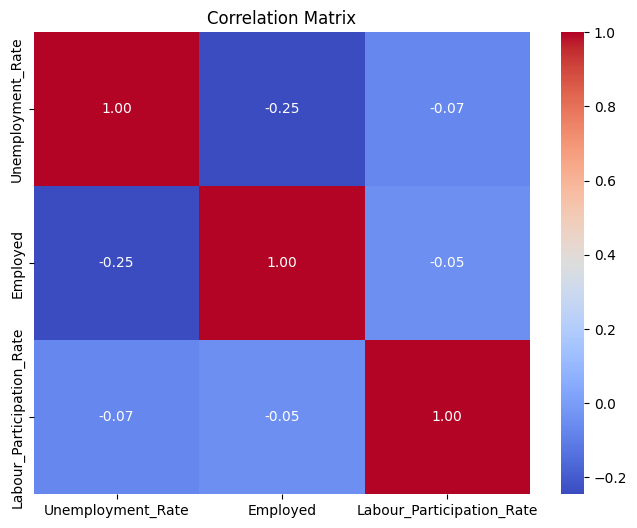

In [30]:
# Calculate correlation matrix
correlation_matrix = data[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Print key insights
print("Key Insights:")
print("- The highest unemployment rate was observed in:", data.loc[data['Unemployment_Rate'].idxmax(), 'Region'])
print("- The lowest unemployment rate was observed in:", data.loc[data['Unemployment_Rate'].idxmin(), 'Region'])
print("- The average unemployment rate across all regions is:", round(data['Unemployment_Rate'].mean(), 2), "%")

Key Insights:
- The highest unemployment rate was observed in: Puducherry
- The lowest unemployment rate was observed in: Karnataka
- The average unemployment rate across all regions is: 12.24 %
